# Data Wrangling Executive Summary


---
# Data Wrangling

We need to acquire and prepare:
1. Curriculum Access Logs
2. Cohort ID Table

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta

# import helper functions
import main
import acquire
import prepare

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Acquisition
---
Both datasets are saved locally. We can use functions contained in `src/acquire.py` to read in our datasets.

In [2]:
# Load currciculum access logs
df_log = acquire.get_log_data()

# Load cohort id data
df_cohorts = acquire.get_cohort_data()

## Curriculum Access Logs

In [3]:
print(df_log.shape)
df_log.head()

(719459, 6)


,date,time,page_viewed,user_id,cohort_id,ip
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [4]:
df_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719459 entries, 0 to 719458
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date         719459 non-null  object 
 1   time         719459 non-null  object 
 2   page_viewed  719458 non-null  object 
 3   user_id      719459 non-null  int64  
 4   cohort_id    674619 non-null  float64
 5   ip           719459 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 32.9+ MB


In [5]:
df_log.describe()

,user_id,cohort_id
count,719459.000000,674619.000000
mean,392.945478,37.173660
std,211.655544,14.971385
min,1.000000,1.000000
25%,230.000000,26.000000
50%,417.000000,32.000000
75%,568.000000,53.000000
max,787.000000,62.000000


In [6]:
df_log.nunique()

date            1012
time           70937
page_viewed     2153
user_id          787
cohort_id         40
ip              4339
dtype: int64

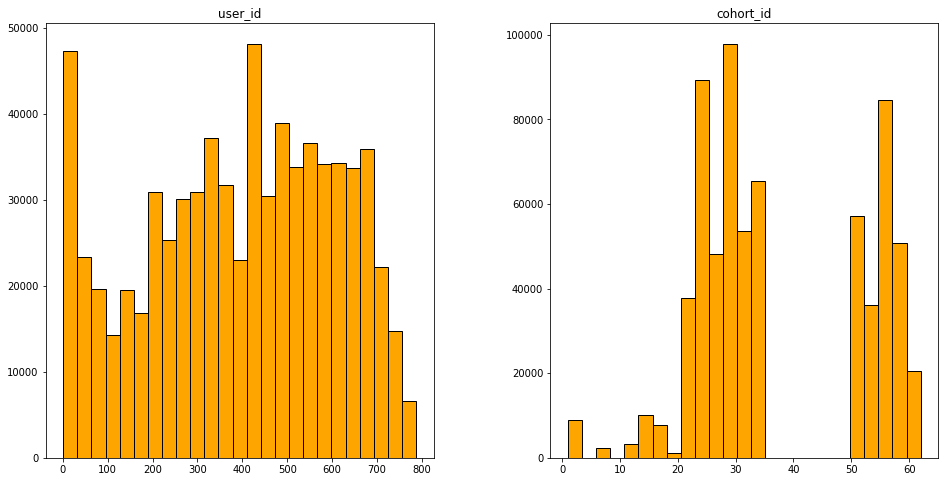

In [7]:
df_log.hist(figsize=(16, 8),
            color='orange',
            ec='black',
            grid=False,
            bins=25);

In [8]:
pd.concat([df_log.head(1), df_log.tail(1)])

,date,time,page_viewed,user_id,cohort_id,ip
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
719458,2020-11-02,16:48:47,javascript-i/bom-and-dom/bom,763,62.0,107.192.148.199


### Curriculum Access Logs's: Initial Review
1. 719,459 rows and 6 columns.
2. Missing values in columns: `cohort_id` and  `page_viewed`.
3. `date` and `time` columns are object data types. In data prep, cast into datetime data type.
4. 787 Unique `user_id`'s - unique, sequential, non-nan values.
5. 1012 days of logs.
6. 2153 unique pages users accessed.
7. 4339 unique `ip` addresses
6. 40 cohorts
---
## Cohort ID's

In [9]:
print(df_cohorts.shape)
df_cohorts.head()

(46, 5)


,cohort_id,name,start_date,end_date,program_id
0,1,Arches,2014-02-04,2014-04-22,1
1,2,Badlands,2014-06-04,2014-08-22,1
2,3,Carlsbad,2014-09-04,2014-11-05,1
3,4,Denali,2014-10-20,2015-01-18,1
4,5,Everglades,2014-11-18,2015-02-24,1


In [10]:
df_cohorts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   cohort_id   46 non-null     int64 
 1   name        46 non-null     object
 2   start_date  46 non-null     object
 3   end_date    46 non-null     object
 4   program_id  46 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1.9+ KB


In [11]:
df_cohorts.nunique()

cohort_id     46
name          46
start_date    44
end_date      45
program_id     4
dtype: int64

In [12]:
df_cohorts.describe()

,cohort_id,program_id
count,46.000000,46.000000
mean,29.369565,1.869565
std,24.478888,0.748590
min,1.000000,1.000000
25%,12.250000,1.000000
50%,23.500000,2.000000
75%,46.750000,2.000000
max,132.000000,4.000000


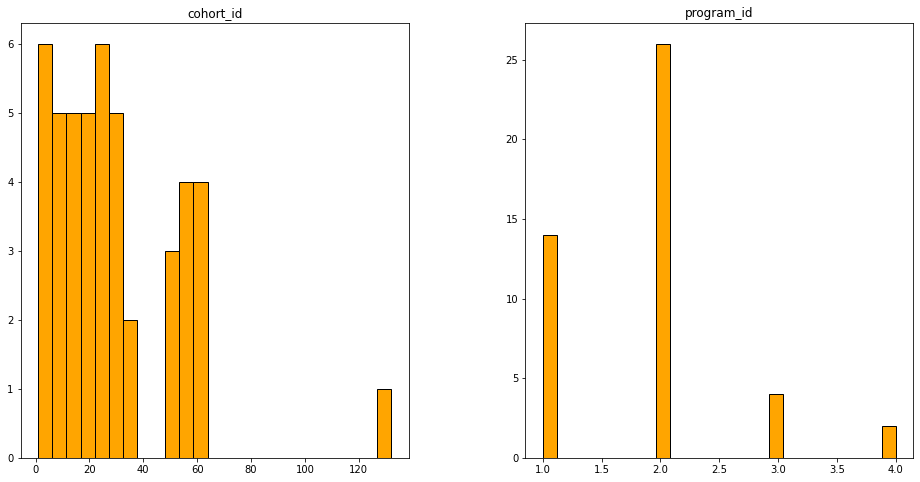

In [13]:
df_cohorts.hist(figsize=(16, 8),
                color='orange',
                ec='black',
                grid=False,
                bins=25);

### Cohort ID data: Initial Review

- 46 columns and 5 rows.
- 46 cohorts with 46 unique cohort id's.
- 4 Cohorts started on the same date.
- 2 Cohorts ended on the same date.
- 4 unique `program_id`'s to determine the class type: Web Development or Data Science.
- `start_date` and `end_date` columns are object data types. Cast into datetime data types.

# Data Preparation

1. Merge the datasets together.
2. Convert `date`, `time`, `start_date`, and  `end_date` object columns into datetime data types.
3. Convert `cohort_id` and `program_id` float64 columns into integer data types.
4. Infer the program types: Web Development or Data Science using `program_id`.
5. Create a new boolean column called `is_enrolled` to indicate if a user is in an active cohort.
4. Handle missing values.

## Merge datasets together
Steps 2 and 3 are completed here using a function in prepare.py called `prep_log_cohort_data()`<br>
>2. Convert date, time, start_date, and end_date object columns into datetime data types.<br>
>3. Convert cohort_id and program_id float64 columns into integer data types.

In [14]:
df = prepare.prep_log_cohort_data(df_log, df_cohorts)

In [15]:
print(df.shape)
df.head()

(719459, 9)


,date,page_viewed,user_id,cohort_id,ip,cohort_name,program_start,end_date,program_id
0,2018-01-26 09:55:03,/,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
1,2018-01-26 09:56:02,java-ii,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2,2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
3,2018-01-26 09:56:06,slides/object_oriented_programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
4,2018-01-26 09:56:24,javascript-i/conditionals,2,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 719459 entries, 0 to 719458
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date           719459 non-null  datetime64[ns]
 1   page_viewed    719459 non-null  object        
 2   user_id        719459 non-null  int64         
 3   cohort_id      719459 non-null  int64         
 4   ip             719459 non-null  object        
 5   cohort_name    719459 non-null  object        
 6   program_start  719459 non-null  datetime64[ns]
 7   end_date       719459 non-null  datetime64[ns]
 8   program_id     719459 non-null  int64         
dtypes: datetime64[ns](3), int64(3), object(3)
memory usage: 54.9+ MB


In [17]:
df.describe()

,user_id,cohort_id,program_id
count,719459.000000,719459.000000,719459.000000
mean,392.945478,34.856826,1.928082
std,211.655544,17.056681,0.616859
min,1.000000,0.000000,0.000000
25%,230.000000,24.000000,2.000000
50%,417.000000,31.000000,2.000000
75%,568.000000,53.000000,2.000000
max,787.000000,62.000000,4.000000


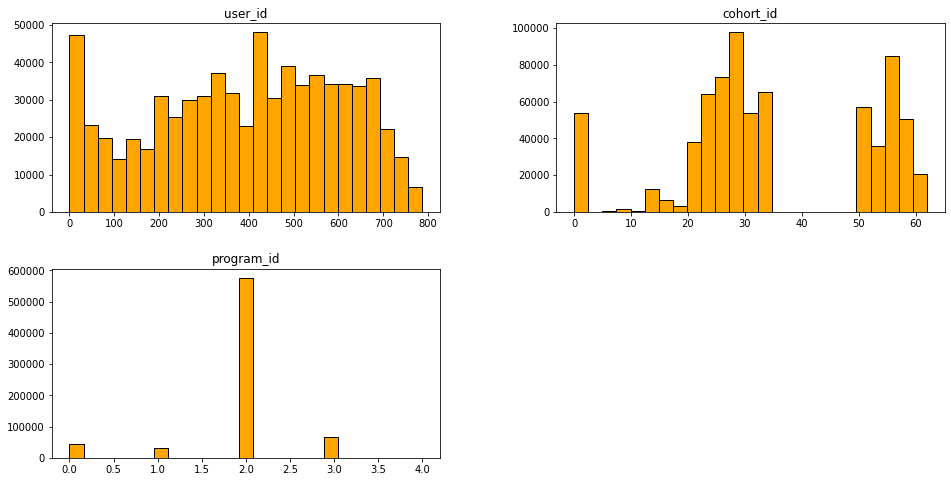

In [18]:
df.hist(figsize=(16, 8),
        color='orange',
        ec='black',
        grid=False,
        bins=25);

## Infer program type
Create a new column named `program_type`.
Use `program_id` and `page_viewed` to infer what program a user is in: Web Development or Data Science.

In [19]:
# `program_id == 0` is a mix of Data Science and Web Development
# We'll take a deeper look at this in a bit.
df.loc[df.program_id==0].page_viewed.value_counts().nlargest(10)

/                             4048
search/search_index.json      1791
javascript-i                   639
toc                            605
html-css                       425
java-ii                        414
Intro_to_Regression_Module     397
jquery                         393
Regression_Python              355
javascript-ii                  330
Name: page_viewed, dtype: int64

In [20]:
# `program_id == 1` is Web Development
df.loc[df.program_id==1].page_viewed.value_counts().nlargest(10)

/                1610
index.html       1011
javascript-i      736
html-css          542
spring            501
java-iii          479
java-ii           454
java-i            444
javascript-ii     429
appendix          409
Name: page_viewed, dtype: int64

In [21]:
# `program_id == 2` is Web Development
df.loc[df.program_id==2].page_viewed.value_counts().nlargest(10)

/                           29057
toc                         13252
javascript-i                13166
search/search_index.json    12152
java-iii                    10131
html-css                     9821
java-ii                      9502
spring                       9198
jquery                       8502
mysql                        8490
Name: page_viewed, dtype: int64

In [22]:
# `program_id == 3` is Data Science
df.loc[df.program_id==3].page_viewed.value_counts().nlargest(10)

/                                                    5406
1-fundamentals/modern-data-scientist.jpg             1563
1-fundamentals/AI-ML-DL-timeline.jpg                 1559
1-fundamentals/1.1-intro-to-data-science             1536
search/search_index.json                             1331
6-regression/1-overview                              1123
classification/overview                               860
10-anomaly-detection/AnomalyDetectionCartoon.jpeg     745
10-anomaly-detection/1-overview                       742
3-sql/1-mysql-overview                                704
Name: page_viewed, dtype: int64

In [23]:
# `program_id == 4` is Web Development
df.loc[df.program_id==4].page_viewed.value_counts().nlargest(20)

content/html-css                               2
content/html-css/introduction.html             1
content/html-css/gitbook/images/favicon.ico    1
/                                              1
Name: page_viewed, dtype: int64

### Infer Program Type: Data Prep Notes
Create the following DataFrame and merge it with df.

| `program_id` | `program type` |
| :----------- | -------------- |
| 0 | Mix of Data Science and Web Development |
| 1 | Web Development |
| 2 | Web Development |
| 3 | Data Science |
| 4 | Web Development |


In [24]:
df_programs = pd.DataFrame({ 'program_id' : range(0, 5),
                            'program_type': ['Web Development and Data Science',
                                             'Web Development', 
                                             'Web Development',
                                             'Data Science',
                                             'Web Development']})

df_programs

,program_id,program_type
0,0,Web Development and Data Science
1,1,Web Development
2,2,Web Development
3,3,Data Science
4,4,Web Development


In [25]:
# Merge the datasets together
# `add_program_type()` function added to prepare.py
df = prepare.append_program_type(df)

In [26]:
df.head()

,date,page_viewed,user_id,cohort_id,ip,cohort_name,program_start,end_date,program_id,program_type
0,2018-01-26 09:55:03,/,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,Web Development
1,2018-01-26 09:56:02,java-ii,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,Web Development
2,2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,Web Development
3,2018-01-26 09:56:06,slides/object_oriented_programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,Web Development
4,2018-01-26 10:14:47,/,11,1,97.105.19.61,Arches,2014-02-04,2014-04-22,1,Web Development


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 719459 entries, 0 to 719458
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date           719459 non-null  datetime64[ns]
 1   page_viewed    719459 non-null  object        
 2   user_id        719459 non-null  int64         
 3   cohort_id      719459 non-null  int64         
 4   ip             719459 non-null  object        
 5   cohort_name    719459 non-null  object        
 6   program_start  719459 non-null  datetime64[ns]
 7   end_date       719459 non-null  datetime64[ns]
 8   program_id     719459 non-null  int64         
 9   program_type   719459 non-null  object        
dtypes: datetime64[ns](3), int64(3), object(4)
memory usage: 60.4+ MB


## Is the user in an active cohort or have they graduated? 
Create a new column named `has_graduated` to indicate if a user is in an active cohort.

| Feature | Description | Values and Data Type |
| :------ | :---------- | :------------------- |
| `has_graduated` | Indicates whether has graduated | 1 : indicates a user has graduated, 0 : indicates a user has not graduated : __dtype int__ |

To determine if a cohort is still active we need to create a variable to hold the last date in the dateset: 11, 2, 2020.

In [28]:
# Create a variable to store today's date.
today = datetime(2020, 11, 2)

# Filter the dataset to locate active cohorts.
active_cohort_ids = df.loc[df['end_date'] < today].cohort_id.value_counts().index.to_list()
active_cohort_names = df.loc[df['end_date'] < today].cohort_name.value_counts().index.to_list()

# Display active cohort ids and cohort names
# Shout out to Darden
print(f'Active Cohort IDs: {active_cohort_ids}')
print(f'Active Cohort Names: {active_cohort_names}')

Active Cohort IDs: [28, 0, 33, 29, 53, 24, 57, 56, 22, 51, 32, 23, 26, 52, 25, 31, 34, 27, 55, 14, 1, 21, 17, 13, 18, 8, 19, 16, 15, 7, 12, 11, 2, 6, 9, 4, 5]
Active Cohort Names: ['Staff', 0, 'Ceres', 'Zion', 'Fortuna', 'Voyageurs', 'Ganymede', 'Apex', 'Teddy', 'Deimos', 'Betelgeuse', 'Ulysses', 'Xanadu', 'Europa', 'Wrangell', 'Andromeda', 'Bayes', 'Yosemite', 'Curie', 'Lassen', 'Arches', 'Sequoia', 'Olympic', 'Kings', 'Pinnacles', 'Hampton', 'Quincy', 'Niagara', 'Mammoth', 'Glacier', 'Joshua', 'Ike', 'Badlands', 'Franklin', 'Apollo', 'Denali', 'Everglades']


In [29]:
df['has_graduated'] = df.cohort_id.isin(active_cohort_ids).astype(np.int)

In [30]:
df.has_graduated.value_counts()

1    648188
0     71271
Name: has_graduated, dtype: int64

## Is the user active?
Create 3 new columns called `active_within_30_days`, `active_within_60_days`, `active_within_90_days`, `active_within_180_days`, `active_within_365_days`.

These columns will indicate if a user has accessed the curriculum within 30, 60, 90, 180, and 365 days. Pay attention: These columns will not double count one another. These columns will be similar to bins.

In [31]:
today

datetime.datetime(2020, 11, 2, 0, 0)

In [32]:
# Groupby user id and aggregate by date to find the first access and the last access
df_user_age = df.groupby('user_id')['date'].agg(['min', 'max'])

# Calculate the number of days a user has had access to the curriculum.
# Convert the timedelta to days. Convert days from float to an integer value.
df_user_age = df_user_age.assign(
    days_with_access = (df_user_age['max'] \
                       - df_user_age['min'])
                      .astype('timedelta64[D]')
                      .astype(np.int64)
)

# rename columns for clarity
df_user_age.rename(columns={'min':'first_access',
                            'max':'last_access'},
                   inplace=True)

In [33]:
print(df_user_age.shape)
df_user_age.head()

(787, 3)


,first_access,last_access,days_with_access
user_id,,,
1,2018-01-26 09:55:03,2020-11-02 11:13:40,1011
2,2018-01-26 09:56:24,2018-05-10 18:25:38,104
3,2018-01-26 09:56:46,2019-04-06 21:32:32,435
4,2018-01-26 09:58:26,2018-03-27 14:28:18,60
5,2018-01-26 09:59:22,2018-07-19 14:08:20,174


In [34]:
df_user_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 787 entries, 1 to 787
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   first_access      787 non-null    datetime64[ns]
 1   last_access       787 non-null    datetime64[ns]
 2   days_with_access  787 non-null    int64         
dtypes: datetime64[ns](2), int64(1)
memory usage: 24.6 KB


In [35]:
five_days = (today - timedelta(5)).date()
one_month = (today - timedelta(30)).date()
three_months = (today - timedelta(90)).date()
six_months = (today - timedelta(180)).date()

# Testing to see if the correct datetime format was assigned
one_month

datetime.date(2020, 10, 3)

In [36]:
# Assign `last_access` to a variable to make the code less verbose.
last_access = pd.to_datetime(df_user_age.last_access).dt.date

# Create columns of user log activity.
df_user_age['active_within_5_days'] = (last_access > five_days).astype(np.int)

df_user_age['active_within_1_month'] = ((last_access < five_days)\
                                       & (last_access >= one_month)
                                       ).astype(np.int)

df_user_age['active_within_6_months'] = ((last_access < three_months)\
                                        & (last_access >= six_months)
                                        ).astype(np.int)

df_user_age['active_greater_than_6_months'] = (last_access < six_months).astype(np.int)

df_user_age.reset_index(inplace=True)
df.merge(df_user_age)

,date,page_viewed,user_id,cohort_id,ip,cohort_name,program_start,end_date,program_id,program_type,has_graduated,first_access,last_access,days_with_access,active_within_5_days,active_within_1_month,active_within_6_months,active_greater_than_6_months
0,2018-01-26 09:55:03,/,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,Web Development,1,2018-01-26 09:55:03,2020-11-02 11:13:40,1011,1,0,0,0
1,2018-01-26 09:56:02,java-ii,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,Web Development,1,2018-01-26 09:55:03,2020-11-02 11:13:40,1011,1,0,0,0
2,2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,Web Development,1,2018-01-26 09:55:03,2020-11-02 11:13:40,1011,1,0,0,0
3,2018-01-26 09:56:06,slides/object_oriented_programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,Web Development,1,2018-01-26 09:55:03,2020-11-02 11:13:40,1011,1,0,0,0
4,2018-01-26 10:40:15,javascript-i/functions,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,Web Development,1,2018-01-26 09:55:03,2020-11-02 11:13:40,1011,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719454,2020-11-02 09:11:28,classification/scale_features_or_not.svg,785,59,72.181.127.233,Darden,2020-07-13,2021-01-12,3,Data Science,0,2020-10-26 14:35:01,2020-11-02 14:59:18,7,1,0,0,0
719455,2020-11-02 09:11:34,timeseries/acquire,785,59,72.181.127.233,Darden,2020-07-13,2021-01-12,3,Data Science,0,2020-10-26 14:35:01,2020-11-02 14:59:18,7,1,0,0,0
719456,2020-11-02 10:07:28,timeseries/overview,785,59,72.181.127.233,Darden,2020-07-13,2021-01-12,3,Data Science,0,2020-10-26 14:35:01,2020-11-02 14:59:18,7,1,0,0,0
719457,2020-11-02 14:59:18,/,785,59,72.181.127.233,Darden,2020-07-13,2021-01-12,3,Data Science,0,2020-10-26 14:35:01,2020-11-02 14:59:18,7,1,0,0,0


In [37]:
df = prepare.append_active_status(df)

df.head()

,date,page_viewed,user_id,cohort_id,ip,cohort_name,program_start,end_date,program_id,program_type,has_graduated,first_access,last_access,days_with_access,active_within_5_days,active_within_1_month,active_within_3_months,active_within_6_months,active_greater_than_6_months
0,2018-01-26 09:55:03,/,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,Web Development,1,2018-01-26,2020-11-02,1011,1,0,0,0,0
1,2018-01-26 09:56:02,java-ii,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,Web Development,1,2018-01-26,2020-11-02,1011,1,0,0,0,0
2,2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,Web Development,1,2018-01-26,2020-11-02,1011,1,0,0,0,0
3,2018-01-26 09:56:06,slides/object_oriented_programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,Web Development,1,2018-01-26,2020-11-02,1011,1,0,0,0,0
4,2018-01-26 10:40:15,javascript-i/functions,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,Web Development,1,2018-01-26,2020-11-02,1011,1,0,0,0,0


## Handle Missing Values
Users that are missing a `cohort_id` and `name`.
Assign as `Unassigned` for `cohort_name` where `cohort_id` is 0.

In [38]:
df.cohort_name = df.cohort_name.replace(0, 'Unassigned')

In [39]:
df.cohort_name.value_counts()

Staff         60315
Unassigned    44840
Ceres         40168
Zion          37548
Fortuna       36047
Voyageurs     35624
Ganymede      32447
Apex          31670
Teddy         30328
Deimos        29688
Hyperion      28354
Betelgeuse    28333
Ulysses       28329
Xanadu        27637
Europa        27518
Wrangell      25427
Andromeda     25253
Bayes         25181
Darden        22425
Yosemite      20447
Curie         20411
Bash          11774
Lassen         9495
Arches         8884
Jupiter        8718
Sequoia        7444
Olympic        4925
Kings          2733
Pinnacles      2005
Hampton        1712
Quincy         1165
Niagara         743
Mammoth         691
Glacier         495
Joshua          302
Ike             208
Badlands         93
Franklin         72
Apollo            5
Denali            4
Everglades        1
Name: cohort_name, dtype: int64

In [40]:
df = prepare.prep_log_cohort_data(df_log, df_cohorts, explore=True)

In [41]:
df.head()

,date,page_viewed,user_id,cohort_id,ip,cohort_name,program_start,end_date,program_id,program_type,has_graduated,first_access,last_access,days_with_access,active_within_5_days,active_within_1_month,active_within_3_months,active_within_6_months,active_greater_than_6_months
0,2018-01-26 09:55:03,/,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,Web Development,1,2018-01-26,2020-11-02,1011,1,0,0,0,0
1,2018-01-26 09:56:02,java-ii,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,Web Development,1,2018-01-26,2020-11-02,1011,1,0,0,0,0
2,2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,Web Development,1,2018-01-26,2020-11-02,1011,1,0,0,0,0
3,2018-01-26 09:56:06,slides/object_oriented_programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,Web Development,1,2018-01-26,2020-11-02,1011,1,0,0,0,0
4,2018-01-26 10:40:15,javascript-i/functions,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,Web Development,1,2018-01-26,2020-11-02,1011,1,0,0,0,0
